# Logistic Regression 

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [3]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [4]:
def linear_regression(*args):
    x = args[0]
    y = args[1]
    label = args[2]
    theta = args[3]
    
    p = np.zeros((x.shape[0],3))
    for i in range(0,x.shape[0]):
        p[i] = [1, x[i], y[i]]
     
    value = theta@p.T
    return value


## define sigmoid function with input $x$

In [5]:
def sigmoid(*args):
    x = args[0]
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function for the logistic regression

In [6]:
def logistic_regression(*args):
    value = linear_regression(*args)
    sig = np.zeros(value.shape[0])
    
    for i in range(value.shape[0]):
        sig[i] = sigmoid(value[i])
    
    return sig

def compute_loss(*args):
    x = args[0]
    y = args[1]
    label = args[2]
    theta = args[3]
    
    logistic = logistic_regression(*args)
    loss = 0
    
    for i in range(x.shape[0]):
        r = (-label[i]*np.log(logistic[i]) - (1-label[i])*np.log(1-logistic[i]))
        loss = loss + r 
    
    loss = (1/x.shape[0])*loss
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [7]:
def compute_gradient(*args):
    x = args[0]
    y = args[1]
    label = args[2]
    theta = args[3]
    
    gradient_0 = 0
    gradient_1 = 0
    gradient_2 = 0
    
    r = logistic_regression(*args)
    
    for i in range(x.shape[0]):
        gradient_0 = gradient_0 + (r[i]-label[i])*1
        gradient_1 = gradient_1 + (r[i]-label[i])*x[i]
        gradient_2 = gradient_2 + (r[i]-label[i])*y[i]               
    
    gradient_0 = (1/x.shape[0])*gradient_0
    gradient_1 = (1/x.shape[0])*gradient_1
    gradient_2 = (1/x.shape[0])*gradient_2
    
    gradient = np.array((gradient_0, gradient_1, gradient_2))
    return gradient


## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [21]:
num_iteration   = 1000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate

theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

## iterations for the gradient descent

In [22]:
for i in range(num_iteration):

    theta = theta - learning_rate*compute_gradient(point_x, point_y, label, theta)
    loss = compute_loss(point_x, point_y, label, theta)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))
    print(theta)

iteration =    0, loss = 0.66813
[ 0.          0.00353072 -0.00360356]
iteration =    1, loss = 0.64476
[ 1.15663905e-07  6.94344738e-03 -7.08429770e-03]
iteration =    2, loss = 0.62295
[ 3.32816218e-07  1.02424299e-02 -1.04468031e-02]
iteration =    3, loss = 0.60256
[ 6.33118220e-07  1.34320307e-02 -1.36958331e-02]
iteration =    4, loss = 0.58350
[ 9.95483105e-07  1.65166539e-02 -1.68362256e-02]
iteration =    5, loss = 0.56567
[ 1.39729447e-06  1.95006934e-02 -1.98728268e-02]
iteration =    6, loss = 0.54897
[ 1.81541115e-06  2.23884897e-02 -2.28104323e-02]
iteration =    7, loss = 0.53332
[ 2.22696136e-06  2.51842943e-02 -2.56537395e-02]
iteration =    8, loss = 0.51864
[ 2.60994210e-06  2.78922433e-02 -2.84073117e-02]
iteration =    9, loss = 0.50485
[ 2.94364768e-06  3.05163373e-02 -3.10755517e-02]
iteration =   10, loss = 0.49188
[ 3.20895421e-06  3.30604273e-02 -3.36626839e-02]
iteration =   11, loss = 0.47967
[ 3.38848707e-06  3.55282061e-02 -3.61727427e-02]
iteration =   12

iteration =  109, loss = 0.19555
[-0.00052999  0.14066676 -0.14891022]
iteration =  110, loss = 0.19486
[-0.00053816  0.14120968 -0.14954526]
iteration =  111, loss = 0.19417
[-0.00054634  0.14174819 -0.15017581]
iteration =  112, loss = 0.19350
[-0.00055454  0.14228236 -0.15080195]
iteration =  113, loss = 0.19283
[-0.00056275  0.14281226 -0.15142372]
iteration =  114, loss = 0.19218
[-0.00057097  0.14333795 -0.1520412 ]
iteration =  115, loss = 0.19153
[-0.00057921  0.14385951 -0.15265445]
iteration =  116, loss = 0.19090
[-0.00058746  0.14437699 -0.15326353]
iteration =  117, loss = 0.19027
[-0.00059573  0.14489046 -0.1538685 ]
iteration =  118, loss = 0.18965
[-0.000604    0.14539998 -0.15446942]
iteration =  119, loss = 0.18904
[-0.00061229  0.14590561 -0.15506634]
iteration =  120, loss = 0.18844
[-0.00062059  0.14640741 -0.15565932]
iteration =  121, loss = 0.18785
[-0.00062889  0.14690544 -0.15624841]
iteration =  122, loss = 0.18726
[-0.00063721  0.14739975 -0.15683367]
iterat

iteration =  231, loss = 0.15087
[-0.00155629  0.18672939 -0.205096  ]
iteration =  232, loss = 0.15068
[-0.0015646   0.18700123 -0.20544018]
iteration =  233, loss = 0.15049
[-0.0015729   0.18727197 -0.20578309]
iteration =  234, loss = 0.15030
[-0.0015812   0.18754161 -0.20612473]
iteration =  235, loss = 0.15011
[-0.0015895   0.18781017 -0.20646513]
iteration =  236, loss = 0.14993
[-0.00159779  0.18807765 -0.20680428]
iteration =  237, loss = 0.14974
[-0.00160607  0.18834406 -0.20714219]
iteration =  238, loss = 0.14956
[-0.00161436  0.18860942 -0.20747889]
iteration =  239, loss = 0.14938
[-0.00162263  0.18887372 -0.20781436]
iteration =  240, loss = 0.14920
[-0.00163091  0.18913698 -0.20814863]
iteration =  241, loss = 0.14902
[-0.00163917  0.18939921 -0.2084817 ]
iteration =  242, loss = 0.14884
[-0.00164744  0.18966041 -0.20881359]
iteration =  243, loss = 0.14866
[-0.0016557   0.18992059 -0.20914429]
iteration =  244, loss = 0.14849
[-0.00166395  0.19017976 -0.20947381]
iterat

iteration =  353, loss = 0.13487
[-0.00253588  0.21370295 -0.23978953]
iteration =  354, loss = 0.13478
[-0.00254362  0.21388462 -0.24002637]
iteration =  355, loss = 0.13469
[-0.00255137  0.21406579 -0.2402626 ]
iteration =  356, loss = 0.13460
[-0.0025591   0.21424648 -0.24049823]
iteration =  357, loss = 0.13451
[-0.00256684  0.21442668 -0.24073325]
iteration =  358, loss = 0.13442
[-0.00257457  0.21460639 -0.24096768]
iteration =  359, loss = 0.13434
[-0.00258229  0.21478562 -0.24120151]
iteration =  360, loss = 0.13425
[-0.00259002  0.21496437 -0.24143475]
iteration =  361, loss = 0.13417
[-0.00259773  0.21514265 -0.2416674 ]
iteration =  362, loss = 0.13408
[-0.00260545  0.21532044 -0.24189946]
iteration =  363, loss = 0.13400
[-0.00261315  0.21549777 -0.24213094]
iteration =  364, loss = 0.13391
[-0.00262086  0.21567462 -0.24236183]
iteration =  365, loss = 0.13383
[-0.00262856  0.21585101 -0.24259215]
iteration =  366, loss = 0.13374
[-0.00263625  0.21602693 -0.24282189]
iterat

iteration =  473, loss = 0.12673
[-0.00343663  0.23258249 -0.26456503]
iteration =  474, loss = 0.12668
[-0.00344391  0.23271925 -0.26474551]
iteration =  475, loss = 0.12663
[-0.00345119  0.23285572 -0.26492563]
iteration =  476, loss = 0.12658
[-0.00345847  0.23299192 -0.26510538]
iteration =  477, loss = 0.12653
[-0.00346574  0.23312783 -0.26528478]
iteration =  478, loss = 0.12648
[-0.003473    0.23326346 -0.26546382]
iteration =  479, loss = 0.12643
[-0.00348027  0.23339881 -0.2656425 ]
iteration =  480, loss = 0.12638
[-0.00348753  0.23353388 -0.26582083]
iteration =  481, loss = 0.12633
[-0.00349479  0.23366868 -0.2659988 ]
iteration =  482, loss = 0.12628
[-0.00350204  0.2338032  -0.26617642]
iteration =  483, loss = 0.12623
[-0.00350929  0.23393745 -0.26635369]
iteration =  484, loss = 0.12618
[-0.00351654  0.23407143 -0.26653061]
iteration =  485, loss = 0.12613
[-0.00352378  0.23420513 -0.26670719]
iteration =  486, loss = 0.12608
[-0.00353102  0.23433856 -0.26688341]
iterat

iteration =  600, loss = 0.12155
[-0.00433654  0.24800025 -0.28497588]
iteration =  601, loss = 0.12152
[-0.00434344  0.24810821 -0.28511918]
iteration =  602, loss = 0.12149
[-0.00435035  0.24821599 -0.28526224]
iteration =  603, loss = 0.12146
[-0.00435725  0.24832359 -0.28540508]
iteration =  604, loss = 0.12143
[-0.00436414  0.24843101 -0.28554767]
iteration =  605, loss = 0.12139
[-0.00437104  0.24853825 -0.28569003]
iteration =  606, loss = 0.12136
[-0.00437793  0.24864531 -0.28583216]
iteration =  607, loss = 0.12133
[-0.00438482  0.2487522  -0.28597406]
iteration =  608, loss = 0.12130
[-0.00439171  0.2488589  -0.28611572]
iteration =  609, loss = 0.12127
[-0.00439859  0.24896543 -0.28625715]
iteration =  610, loss = 0.12124
[-0.00440547  0.24907178 -0.28639835]
iteration =  611, loss = 0.12121
[-0.00441235  0.24917796 -0.28653933]
iteration =  612, loss = 0.12117
[-0.00441923  0.24928396 -0.28668007]
iteration =  613, loss = 0.12114
[-0.00442611  0.24938979 -0.28682058]
iterat

iteration =  733, loss = 0.11805
[-0.00523433  0.26095726 -0.30219871]
iteration =  734, loss = 0.11802
[-0.00524094  0.26104524 -0.30231578]
iteration =  735, loss = 0.11800
[-0.00524755  0.26113309 -0.30243269]
iteration =  736, loss = 0.11798
[-0.00525415  0.26122083 -0.30254944]
iteration =  737, loss = 0.11796
[-0.00526075  0.26130843 -0.30266603]
iteration =  738, loss = 0.11794
[-0.00526735  0.26139592 -0.30278245]
iteration =  739, loss = 0.11792
[-0.00527394  0.26148328 -0.30289871]
iteration =  740, loss = 0.11790
[-0.00528054  0.26157051 -0.30301481]
iteration =  741, loss = 0.11788
[-0.00528713  0.26165763 -0.30313074]
iteration =  742, loss = 0.11785
[-0.00529372  0.26174462 -0.30324652]
iteration =  743, loss = 0.11783
[-0.00530031  0.26183149 -0.30336213]
iteration =  744, loss = 0.11781
[-0.0053069   0.26191824 -0.30347758]
iteration =  745, loss = 0.11779
[-0.00531349  0.26200487 -0.30359287]
iteration =  746, loss = 0.11777
[-0.00532007  0.26209137 -0.30370801]
iterat

iteration =  852, loss = 0.11586
[-0.00600772  0.27063116 -0.31507818]
iteration =  853, loss = 0.11584
[-0.00601412  0.27070626 -0.3151782 ]
iteration =  854, loss = 0.11583
[-0.00602052  0.27078127 -0.3152781 ]
iteration =  855, loss = 0.11581
[-0.00602691  0.27085619 -0.31537787]
iteration =  856, loss = 0.11579
[-0.0060333   0.27093101 -0.31547752]
iteration =  857, loss = 0.11578
[-0.00603969  0.27100574 -0.31557705]
iteration =  858, loss = 0.11576
[-0.00604608  0.27108037 -0.31567645]
iteration =  859, loss = 0.11575
[-0.00605247  0.27115492 -0.31577573]
iteration =  860, loss = 0.11573
[-0.00605886  0.27122937 -0.31587488]
iteration =  861, loss = 0.11572
[-0.00606524  0.27130372 -0.31597392]
iteration =  862, loss = 0.11570
[-0.00607162  0.27137799 -0.31607283]
iteration =  863, loss = 0.11569
[-0.00607801  0.27145216 -0.31617161]
iteration =  864, loss = 0.11567
[-0.00608439  0.27152624 -0.31627028]
iteration =  865, loss = 0.11566
[-0.00609076  0.27160023 -0.31636882]
iterat

iteration =  969, loss = 0.11426
[-0.00674616  0.27882983 -0.32599813]
iteration =  970, loss = 0.11425
[-0.00675239  0.27889519 -0.32608518]
iteration =  971, loss = 0.11423
[-0.00675861  0.27896047 -0.32617212]
iteration =  972, loss = 0.11422
[-0.00676484  0.27902567 -0.32625897]
iteration =  973, loss = 0.11421
[-0.00677107  0.2790908  -0.32634572]
iteration =  974, loss = 0.11420
[-0.00677729  0.27915586 -0.32643237]
iteration =  975, loss = 0.11419
[-0.00678351  0.27922085 -0.32651893]
iteration =  976, loss = 0.11417
[-0.00678974  0.27928576 -0.32660538]
iteration =  977, loss = 0.11416
[-0.00679596  0.2793506  -0.32669174]
iteration =  978, loss = 0.11415
[-0.00680218  0.27941537 -0.326778  ]
iteration =  979, loss = 0.11414
[-0.00680839  0.27948006 -0.32686417]
iteration =  980, loss = 0.11413
[-0.00681461  0.27954468 -0.32695024]
iteration =  981, loss = 0.11412
[-0.00682083  0.27960923 -0.32703621]
iteration =  982, loss = 0.11410
[-0.00682704  0.27967371 -0.32712208]
iterat

## plot the results

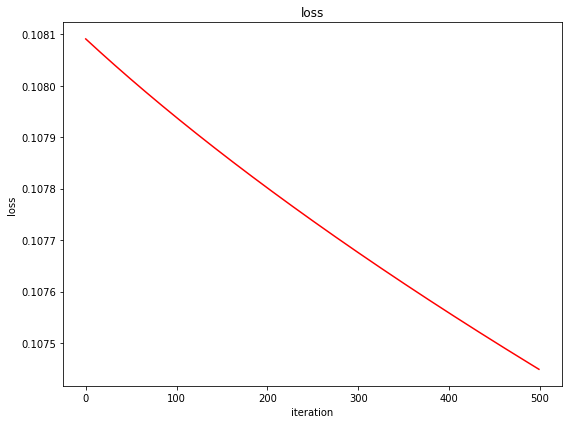

In [20]:
def plot_loss_curve(*args):

    plt.figure(figsize=(8,6))   
    plt.title('loss')


    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    
plot_loss_curve(loss_iteration)

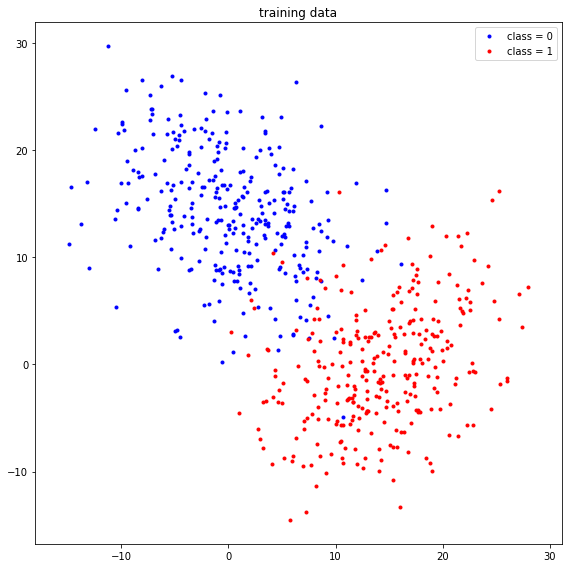

In [11]:
def plot_data(point_x, point_y, label):
    
    plt.figure(figsize=(8,8))
    plt.title('training data')
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_data(point_x, point_y, label)

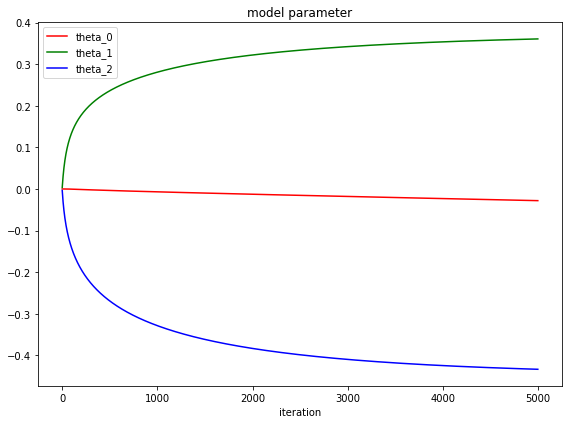

In [12]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    n = theta_iteration.shape[0]
    r = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(0,n):
        r[i] = theta_iteration[i][0]
        g[i] = theta_iteration[i][1]
        b[i] = theta_iteration[i][2]
        
    plt.plot(list(range(0,n)), r, '-', color = 'red' , label = "theta_0")
    plt.plot(list(range(0,n)), g, '-', color = 'green', label = "theta_1")
    plt.plot(list(range(0,n)), b, '-', color = 'blue', label = "theta_2")
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
plot_model_parameter(theta_iteration)

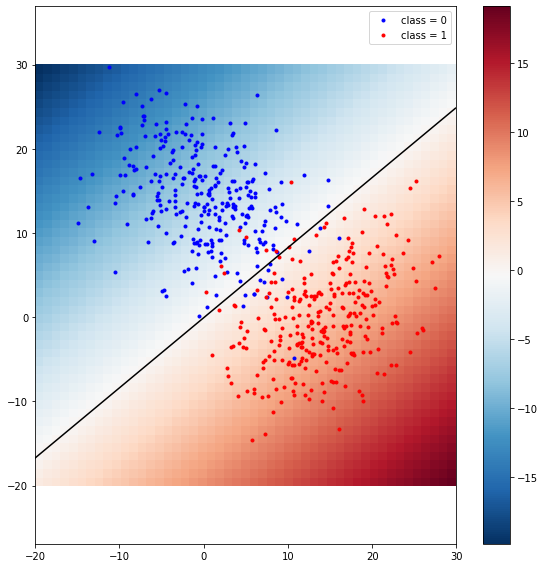

In [13]:
def plot_classifier(point_x, point_y, label, theta):

    plt.figure(figsize=(8,8))
    
    x = np.linspace(-20, 30) 
    y = np.linspace(-20, 30)
    X,Y = np.meshgrid(x,y)
    Z = theta[0] + theta[1]*X + theta[2]*Y
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'))
    plt.colorbar()
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    
    line_x = np.arange(-20, 30, 0.1)
    line_y = -1*(1/theta[2])*(theta[0] + theta[1]*line_x)
    plt.plot(line_x, line_y, '-', color = 'black')
    
    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_classifier(point_x, point_y, label, theta)

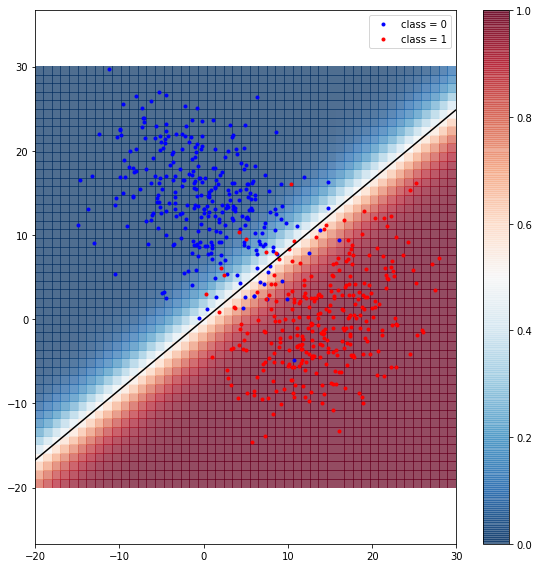

In [14]:
def plot_classifier2(point_x, point_y, label, theta):

    plt.figure(figsize=(8,8))
    
    x = np.linspace(-20, 30, 50) 
    y = np.linspace(-20, 30, 50)
    X,Y = np.meshgrid(x,y)
    Z = sigmoid(theta[0] + theta[1]*X + theta[2]*Y)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'), alpha=0.7, vmin=0, vmax=1)
    plt.colorbar()
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    
    line_x = np.arange(-20, 30, 0.1)
    line_y = -1*(1/theta[2])*(theta[0] + theta[1]*line_x)
    plt.plot(line_x, line_y, '-', color = 'black')
    
    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_classifier2(point_x, point_y, label, theta)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

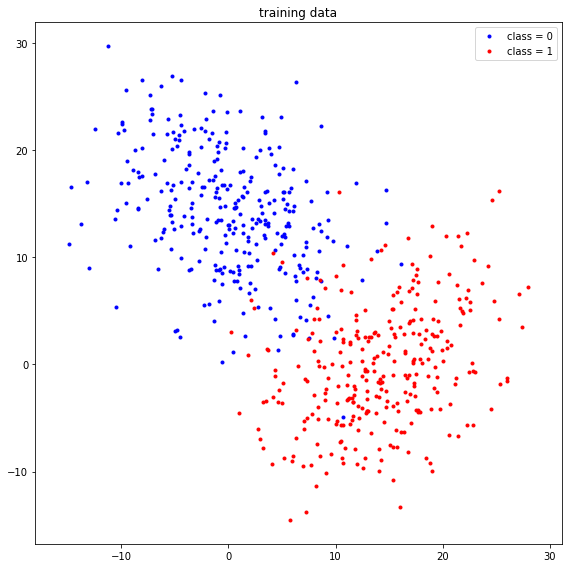

In [15]:
plot_data(point_x, point_y, label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

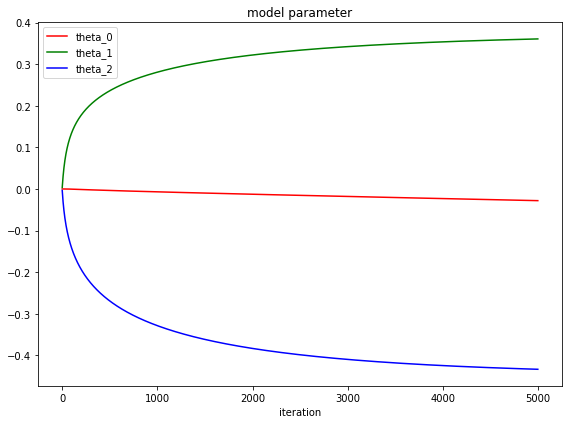

In [16]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

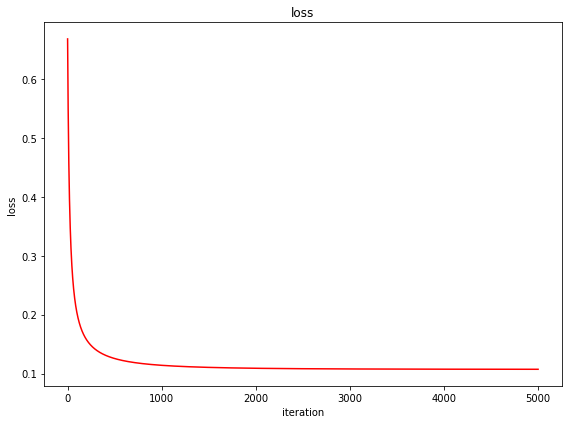

In [17]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

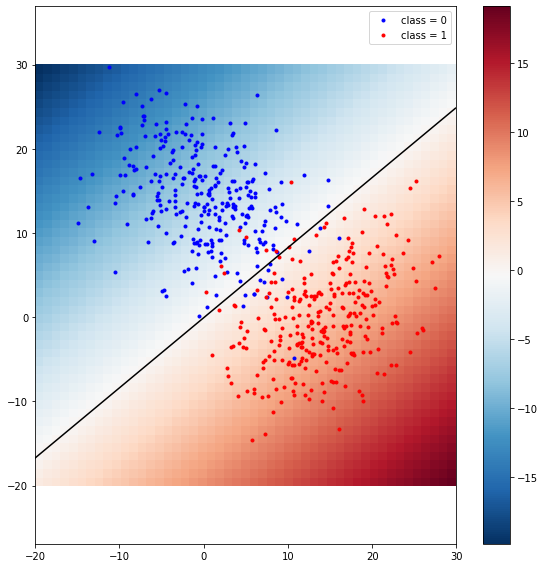

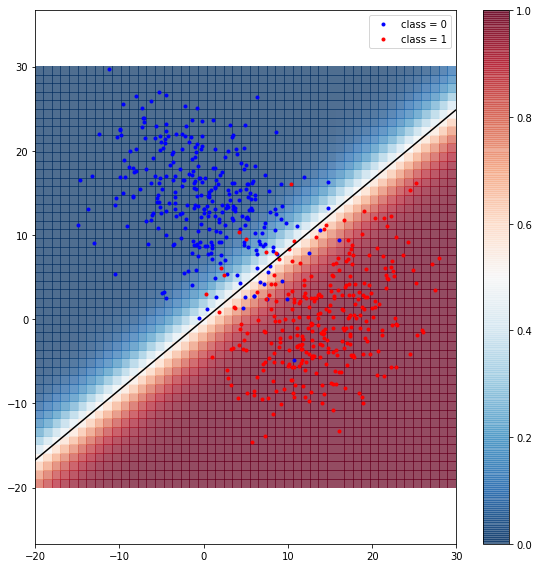

In [18]:
#with linear regression
plot_classifier(point_x, point_y, label, theta)
#with logistic regression (sigmoid)
plot_classifier2(point_x, point_y, label, theta)